In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

from bitcoin import engine
df = engine.load_data('BTC-EUR')
df.head()

engine.predict_order('BTC-EUR')

SyntaxError: unexpected EOF while parsing (<fstring>, line 1)

In [2]:
df[df.isnull().any(axis=1)]

,time,low,high,open,close,volume,tw_sentiment,tw_followers,reddit_sentiment,google_sentiment
1657,1520372160,NaN,NaN,NaN,NaN,0.654339,0.025497,865323.0,-0.010816,0.081297
1709,1520375280,NaN,8680.46,8680.46,8680.46,0.371350,0.024812,872689.0,0.006467,0.094706
2861,1520444460,NaN,NaN,7907.19,7911.75,0.357159,0.569371,195556.0,0.022494,0.145950
3358,1520474220,NaN,NaN,NaN,7979.99,0.010000,0.257240,43314.0,0.066666,0.031460


In [3]:
df.describe()

,time,low,high,open,close,volume,tw_sentiment,tw_followers,reddit_sentiment,google_sentiment
count,4.049000e+03,4045.00000,4046.000000,4047.000000,4048.000000,4049.000000,4049.000000,4.049000e+03,4049.000000,4049.000000
mean,1.520394e+09,8600.09041,8606.130131,8603.186644,8602.822616,1.880316,0.071410,6.725147e+05,0.048834,0.108310
std,7.026405e+04,478.85984,475.258874,476.945605,477.094225,4.745109,0.080570,3.229060e+05,0.036176,0.053103
min,1.520272e+09,7605.06000,7699.780000,7692.010000,7657.880000,0.001000,-0.084993,3.705000e+04,-0.017144,-0.040045
25%,1.520333e+09,8115.03000,8120.010000,8118.010000,8118.010000,0.136590,0.035437,4.703310e+05,0.019430,0.055682
50%,1.520394e+09,8625.01000,8634.640000,8628.400000,8628.420000,0.500000,0.061983,6.535360e+05,0.049986,0.109587
75%,1.520455e+09,8899.99000,8908.067500,8900.000000,8901.982500,1.690868,0.082967,8.994540e+05,0.083003,0.160463
max,1.520516e+09,9399.00000,9399.000000,9399.000000,9399.000000,90.488639,0.612404,1.365095e+06,0.113225,0.211511


In [4]:
df.corr()

,time,low,high,open,close,volume,tw_sentiment,tw_followers,reddit_sentiment,google_sentiment
time,1.000000,-0.944671,-0.946534,-0.945622,-0.945594,0.122973,0.118583,-0.751382,0.105908,-0.266675
low,-0.944671,1.000000,0.999647,0.999779,0.999853,-0.197081,-0.204322,0.743117,-0.033872,0.343731
high,-0.946534,0.999647,1.000000,0.999850,0.999830,-0.177521,-0.195787,0.744024,-0.035499,0.344496
open,-0.945622,0.999779,0.999850,1.000000,0.999737,-0.184287,-0.200818,0.743593,-0.034323,0.343804
close,-0.945594,0.999853,0.999830,0.999737,1.000000,-0.188151,-0.202373,0.744050,-0.034518,0.343906
volume,0.122973,-0.197081,-0.177521,-0.184287,-0.188151,1.000000,0.357760,-0.134925,-0.050769,-0.011539
tw_sentiment,0.118583,-0.204322,-0.195787,-0.200818,-0.202373,0.357760,1.000000,-0.222083,-0.024051,-0.009082
tw_followers,-0.751382,0.743117,0.744024,0.743593,0.744050,-0.134925,-0.222083,1.000000,-0.068419,0.212418
reddit_sentiment,0.105908,-0.033872,-0.035499,-0.034323,-0.034518,-0.050769,-0.024051,-0.068419,1.000000,-0.477255
google_sentiment,-0.266675,0.343731,0.344496,0.343804,0.343906,-0.011539,-0.009082,0.212418,-0.477255,1.000000


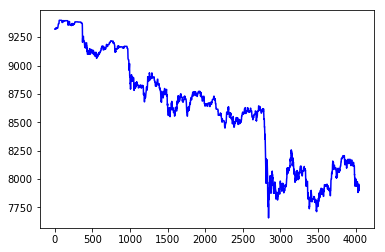

In [5]:
plt.plot(df['close'], 'b')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10cb25748>,
      dtype=object)

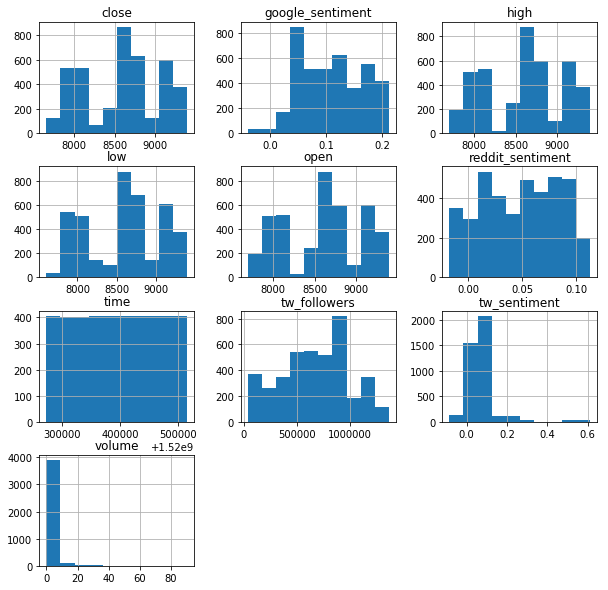

In [6]:
df.hist(figsize=(10,10))

In [7]:
X_train, X_test, y_train, y_test, scaler_x, scaler_y = engine.prepare(df)

In [8]:
model, history = engine.train(X_train, X_test, y_train, y_test)

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 1, 200)            164800    
_________________________________________________________________
dropout_1 (Dropout)          (None, 1, 200)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 1, 200)            320800    
_________________________________________________________________
dropout_2 (Dropout)          (None, 1, 200)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 200)               320800    
_________________________________________________________________
dropout_3 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 201       
__________

([<matplotlib.lines.Line2D at 0x1252f1a90>], 'g')

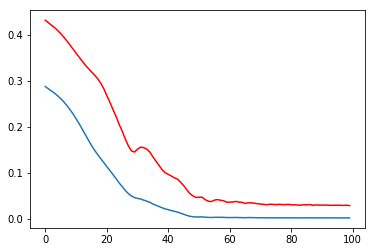

In [9]:
plt.plot(history.history['mean_absolute_error'], 'r')
plt.plot(history.history['mean_squared_error']), 'g'

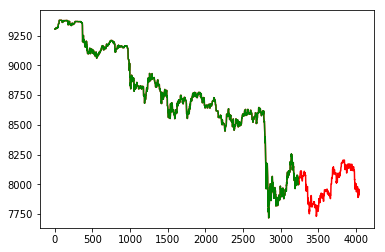

In [10]:
import numpy as np

X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

y_predict_train = model.predict(X_train)
y_predict_train = scaler_y.inverse_transform(y_predict_train)

y_predict_test = model.predict(X_test)
y_predict_test = scaler_y.inverse_transform(y_predict_test)

X = np.concatenate((X_train, X_test), axis=0)
y = np.concatenate((y_predict_train, y_predict_test), axis=0)

plt.plot(y, 'r')
plt.plot(y_predict_train, 'g')

In [11]:
engine.test_order_percent(df, model, scaler_x, scaler_y)

0 / 809 ---> predicted Order.UP - real Order.STAY
6 / 809 ---> predicted Order.DOWN - real Order.STAY
8 / 809 ---> predicted Order.DOWN - real Order.STAY
12 / 809 ---> predicted Order.DOWN - real Order.STAY
15 / 809 ---> predicted Order.DOWN - real Order.STAY
16 / 809 ---> predicted Order.DOWN - real Order.STAY
17 / 809 ---> predicted Order.DOWN - real Order.STAY
25 / 809 ---> predicted Order.DOWN - real Order.STAY
29 / 809 ---> predicted Order.DOWN - real Order.UP
32 / 809 ---> predicted Order.UP - real Order.STAY
35 / 809 ---> predicted Order.UP - real Order.STAY
46 / 809 ---> predicted Order.UP - real Order.DOWN
47 / 809 ---> predicted Order.DOWN - real Order.UP
48 / 809 ---> predicted Order.UP - real Order.STAY
49 / 809 ---> predicted Order.DOWN - real Order.STAY
53 / 809 ---> predicted Order.UP - real Order.STAY
58 / 809 ---> predicted Order.UP - real Order.STAY
59 / 809 ---> predicted Order.UP - real Order.STAY
61 / 809 ---> predicted Order.DOWN - real Order.STAY
62 / 809 ---> pr

628 / 809 ---> predicted Order.UP - real Order.DOWN
631 / 809 ---> predicted Order.DOWN - real Order.STAY
638 / 809 ---> predicted Order.UP - real Order.STAY
644 / 809 ---> predicted Order.DOWN - real Order.STAY
652 / 809 ---> predicted Order.UP - real Order.STAY
654 / 809 ---> predicted Order.UP - real Order.DOWN
655 / 809 ---> predicted Order.DOWN - real Order.STAY
658 / 809 ---> predicted Order.DOWN - real Order.STAY
660 / 809 ---> predicted Order.UP - real Order.STAY
662 / 809 ---> predicted Order.DOWN - real Order.STAY
666 / 809 ---> predicted Order.DOWN - real Order.STAY
667 / 809 ---> predicted Order.DOWN - real Order.UP
669 / 809 ---> predicted Order.UP - real Order.STAY
672 / 809 ---> predicted Order.UP - real Order.STAY
673 / 809 ---> predicted Order.UP - real Order.DOWN
675 / 809 ---> predicted Order.UP - real Order.STAY
676 / 809 ---> predicted Order.UP - real Order.STAY
680 / 809 ---> predicted Order.DOWN - real Order.UP
684 / 809 ---> predicted Order.UP - real Order.STAY


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1258ea9b0>]],
      dtype=object)

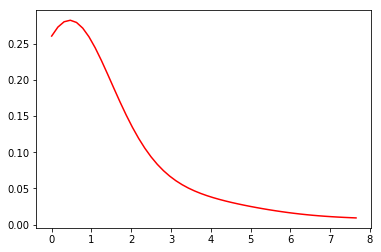

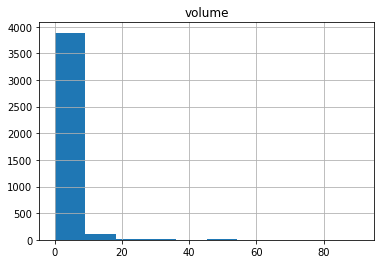

In [14]:
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import GridSearchCV
import numpy as np

X = df['volume'].values.reshape(-1, 1)
params = {'bandwidth': np.logspace(0, df['volume'].max())}
grid = GridSearchCV(KernelDensity(), params)
grid.fit(X)

x = np.linspace(0, np.percentile(X, 95))
log_dens = grid.best_estimator_.score_samples(x.reshape(-1, 1))

plt.plot(x, np.exp(log_dens), 'r')
df.hist(column='volume')